# Frequency Resolution

Introduction
-------------

In this section, we consider the very important problem of resolving two nearby frequencies using the DFT. This spectral analysis problem is one of the cornerstone problems in signal processing and we therefore highlight some nuances. We also investigate the circular convolution as a tool to uncover the mechanics of frequency resolution as the uncertainty principle emerges again.

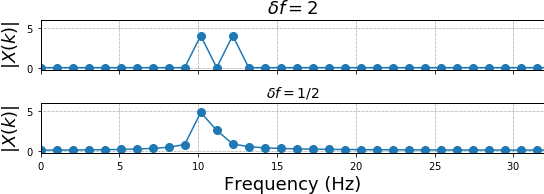

In [8]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp # import and set plot properties

from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import abs, arange, array, exp, linspace, log, log10, cos, sin, sqrt, pi
from numpy.fft import fft, fftshift, fftfreq

figsize = {"figsize":(12,5)}

Nf = 64 # N- DFT size
fs = 64 # sampling frequency
f = 10  # one signal
t = arange(0,1,1/fs) # time-domain samples
deltaf = 1/2. # second nearby frequency

fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,3))

x=cos(2*pi*f*t) + cos(2*pi*(f+2)*t) # 2 Hz frequency difference
X = fft(x,Nf)/sqrt(Nf)
ax[0].plot(linspace(0,fs,Nf),abs(X),'-o')
ax[0].set_title(r'$\delta f = 2$',fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$',fontsize=18)

x=cos(2*pi*f*t) + cos(2*pi*(f+deltaf)*t) # delta_f frequency difference
X = fft(x,Nf)/sqrt(Nf)
ax[1].plot(linspace(0,fs,Nf),abs(X),'-o')
ax[1].set_title(r'$\delta f = 1/2$',fontsize=14)
ax[1].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(left=0, right = fs/2)
ax[1].set_ylim(top=6)
fig.tight_layout()

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Seeking Better Frequency Resolution with Longer DFT
----------------------------------------------------

The top plot above shows the magnitude of the DFT for an input that is the sum of two frequencies separated by 2 Hz. Using the parameters we have chosen for the DFT, we can easily see there are two distinct frequencies in the input signal. The bottom plot shows the same thing except that here the frequencies are only separated by 0.5 Hz and, in this case, the two frequencies are not so easy to separate. From this figure, it would be difficult to conclude how many frequencies are present and at what magnitude.

At this point, the usual next step is to increase the size of the DFT since the frequency resolution is $f_s/N$. Thus, the idea is to increase this resolution until the two frequencies separate. This is shown in the next figure.

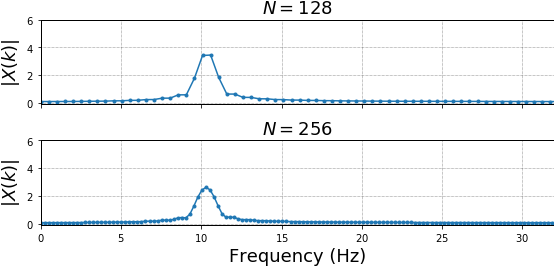

In [9]:
Nf = 64*2
fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,4))

X = fft(x,Nf)/sqrt(Nf)
ax[0].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[0].set_title(r'$N=%d$'%Nf,fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$',fontsize=18)

Nf = 64*4
X = fft(x,Nf)/sqrt(Nf)
ax[1].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[1].set_title(r'$N=%d$'%Nf,fontsize=18)
ax[1].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(left=0, right = fs/2)
ax[1].set_ylim(top=6)
fig.tight_layout()
# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

As the figure above shows, increasing the size of the DFT did not help matters much. Why is this? Didn't we increase the frequency resolution using a larger DFT? Why can't we separate frequencies now? 

The Uncertainty Principle Strikes Back
--------------------------------------------

The problem here  is a manifestation the uncertainty principle we [previously discussed](http://python-for-signal-processing.blogspot.com/2012/09/investigating-sampling-theorem-in-this.html). Remember that taking a larger DFT doesn't add anything new; it just picks off more discrete frequencies on the unit circle.  Note that we want to analyze a particular signal $x(t)$, but we have only a *finite section* of that signal. In other words, what we really have are samples of the product of $x(t),t\in \mathbb{R}$ and a rectangular time-window, $r(t)$, that is zero except $r(t)=1 \Leftrightarrow t\in[0,1]$. This means that the DFT is structured according to the rectangular window, which explains the `sinc` shapes we have seen here.

The following figure shows the updated DFT using a longer duration rectangular window.

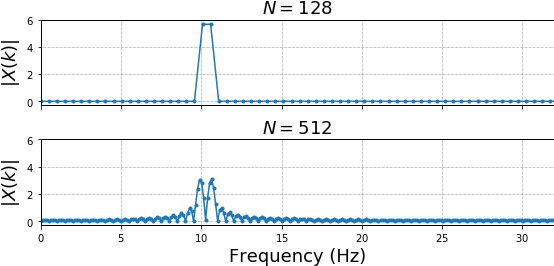

In [10]:
t = arange(0,2,1/fs)
x=cos(2*pi*f*t) + cos(2*pi*(f+deltaf)*t)

Nf = 64*2
fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,4))

X = fft(x,Nf)/sqrt(Nf)
ax[0].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[0].set_title(r'$N=%d$'%Nf,fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$',fontsize=18)

Nf = 64*8
X = fft(x,Nf)/sqrt(Nf)
ax[1].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[1].set_title(r'$N=%d$'%Nf,fontsize=18)
ax[1].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(left=0, right = fs/2)
ax[1].set_ylim(top=6)
fig.tight_layout()

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

The top plot in the figure above shows the DFT of the longer duration signal with $N=128$. The bottom plot shows the same signal with larger DFT length of $N=512$ and a clear separation between the two frequencies. Thus, as opposed to the previous case, a longer DFT *did* resolve the nearby frequencies, but it needed a longer duration signal to do it. Why is this? Consider the DFT of the rectangular windows of length $N_s$,

$$ X[k] = \frac{1}{\sqrt N}\sum_{n=0}^{N_s-1} \exp\left( \frac{2\pi}{N} k n \right) $$

after some re-arrangement, this reduces to


$$ |X[k]|=\frac{ 1}{\sqrt N}\left|\frac{\sin \left( N_s  \frac{2\pi}{N} k\right)}{\sin \left( \frac{2\pi}{N} k \right)}\right|$$

which bears a strong resemblence to our [original](http://python-for-signal-processing.blogspot.com/2012/09/investigating-sampling-theorem-in-this.html) `sinc` function. The following figure is a plot of this function

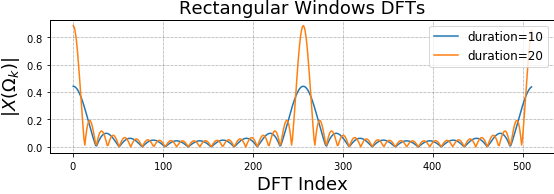

In [11]:
def abs_sinc(k=None,N=64,Ns=32):
    if k is None: k = arange(0,N-1)
    y = np.where(k == 0, 1.0e-20, k)
    return abs(sin( Ns*2*pi/N*y)/sin(2*pi*y/N))/sqrt(N)

fig,ax=plt.subplots()
fig.set_size_inches((8,3))

ax.plot(abs_sinc(N=512,Ns=10),label='duration=10')
ax.plot(abs_sinc(N=512,Ns=20),label='duration=20')
ax.set_xlabel('DFT Index',fontsize=18)
ax.set_ylabel(r'$|X(\Omega_k)|$',fontsize=18)
ax.set_title('Rectangular Windows DFTs',fontsize=18)
ax.legend(loc=0)
plt.tight_layout()

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

Note that the DFT grows taller and narrower as the  sampling duration increases (i.e. longer rectangular window).   The amplitude growth occurs because the longer window accumulates more "energy" than the shorter window. The length of the DFT is the same for both lines shown so only the length of the rectangular window varies. The point is that taking a longer duration rectangular window improves the frequency resolution! This fact is just the uncertainty principle at work. Looking at the `sinc` formula, the null-to-null width of the main lobe in frequency terms is the following

$$ \delta f  = 2\frac{N}{2 N_s}  \frac{f_s}{N} =\frac{f_s}{N_s} $$

Thus, two frequencies that differ by at least this amount should be resolvable in these plots. 

Thus, in our last example, we had $f_s= 64,N_s = 128 \Rightarrow \delta f = 1/2$ Hz and we were trying to separate two frequencies 0.5 Hz apart so we were right on the edge in this case.  I invite you to download this IPython notebook and try longer or shorter signal durations to see show these plots change. Incidentally, this where some define the notion of *frequency bin* as the DFT resolution ($ f_s/N $) divided by this minimal resolution, $ f_s/N_s $ which gives $ N_s/N $. In other words, the DFT measures frequency in discrete *bins* of minimal resolution, $ N_s/N $.

However, sampling over a longer duration only helps when the signal frequencies are *stable* over the longer duration. If these frequencies drift during the longer sampling interval or otherwise become contaminated with other signals, then advanced techniques become necessary.

Let's consider in detail how the DFT of the rectangular window affects resolution by considering the circular convolution.


## Circular Convolution

Suppose we want to compute the DFT of a product $z_n=x_n y_n$ as shown below,

$$ Z_k = \frac{1}{\sqrt N}\sum_{n=0}^{N-1} (x_n y_n) W_N^{n k} $$

in terms of the respective DFTs of $x_n$ and $y_n$, $X_k$ and $Y_k$, respectively, where

$$ x_n = \frac{1}{\sqrt N}\sum_{p=0}^{N-1} X_p  W_N^{-n p} $$

and

$$ y_n = \frac{1}{\sqrt N}\sum_{m=0}^{N-1} Y_m  W_N^{-n m} $$

Then, substituting back in gives,

$$Z_k = \frac{1}{\sqrt N} \frac{1}{N} \sum_{p=0}^{N-1} X_p \sum_{m=0}^{N-1} Y_m \sum_{n=0}^{N-1} W_N^{n k -n p - n m}$$


The last term evaluates to

$$ \sum_{n=0}^{N-1} W_N^{n k -n p - n m} = \frac{1-W_N^{N(k-p-m)}}{1-W_N^{k-p-m}} \hspace{2em} = \frac{1-e^{j2\pi(k-p-m)}}{1-e^{j 2\pi  (k-p-m)/N}}$$ 

This is zero everywhere except where $k-p-m= q N$ ($q\in \mathbb{Z}$) in which case it is $N$. Substituting all this back into our expression gives the *circular convolution*  usually denoted as

$$ Z_k = \frac{1}{\sqrt N} \sum_{p=0}^{N-1} X_p  Y_{((k-p))_N} = X_k \otimes_N Y_k $$

where the double subscripted parenthesis emphasizes the periodic nature of the index. The circular convolution tells us to compute the DFT $Z_k$ directly from the corresponding DFTs $X_k$ and $Y_k$.

Let's work through an example to see this in action.   

In [12]:
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = arange(N)
    U = np.matrix(exp(1j* 2*pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/sqrt(Nfft)

Nf = 32 # DFT size
U = dftmatrix(Nf,Nf)
x = U[:,12].real # input signal
X = U.H*x # DFT of input
rect = np.ones((Nf//2,1)) # short rectangular window
z = x[:Nf//2] # product of rectangular window and x (i.e. chopped version of x) 
R = dftmatrix(Nf,Nf//2).H*rect # DFT of rectangular window
Z = dftmatrix(Nf,Nf//2).H*z    # DFT of product of x_n and r_n

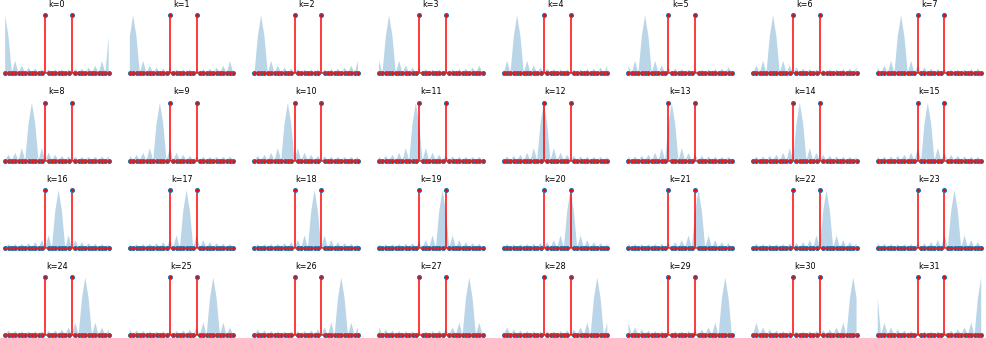

In [13]:
idx=arange(Nf)-arange(Nf)[:,None] # use numpy broadcasting to setup summand's indices
idx[idx<0]+=Nf # add periodic Nf to negative indices for wraparound
a = arange(Nf) # k^th frequency index

fig,ax = plt.subplots(4,8,sharex=True,sharey=True)
fig.set_size_inches((14,5))
for i,j in enumerate(ax.flat):
    #markerline, stemlines, baseline = j.stem(arange(Nf),abs(R[idx[:,i],0])/sqrt(Nf))
    #setp(markerline, 'markersize', 3.)
    j.fill_between(arange(Nf),1/sqrt(Nf)*abs(R[idx[:,i],0]).flat,0,alpha=0.3)
    markerline, stemlines, baseline =j.stem(arange(Nf),abs(X), use_line_collection=True)
    plt.setp(markerline, 'markersize', 4.)
    plt.setp(markerline,'markerfacecolor','r')
    plt.setp(stemlines,'color','r')
    j.axis('off')
    j.set_title('k=%d'%i,fontsize=8)
fig.tight_layout()
    
# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)


The figure above shows the <font color="Blue">rectangular window DFT in blue, $R_k$ </font> against the sinusoid <FONT color="red"> input signal in red, $X_k$, </font> for each value of $k$ as the two terms slide past each other from left to right, top to bottom. In other words, the $k^{th}$ term in $Z_k$, the DFT of the product $x_n r_n $, can be thought of as the inner-product of the red and blue lines. This is not exactly true because we are just plotting magnitudes and not the real/imaginary parts, but it's enough to understand the mechanics of the circular convolution.

A good way to think about the rectangular window's `sinc` shape as it slides past the input signal is as a *probe* with a resolution defined by its mainlobe width. For example, in frame $k=12$, we see that the peak of the rectangular window coincides with the peak of the input frequency so we should expect a large value for $Z_{k=12}$ which is shown below. However, if the rectangular window were shorter, corresponding to a wider mainlobe width, then two nearby frequencies could be draped in the same mainlobe and would then be indistinguishable in the resulting DFT because the DFT for that value of $k$ is the inner-product (i.e. a complex number) of the two overlapping graphs.

The figure below shows the the direct computation of the DFT of $Z_k$ matches the circular convolution method using $X_k$ and $R_k$.

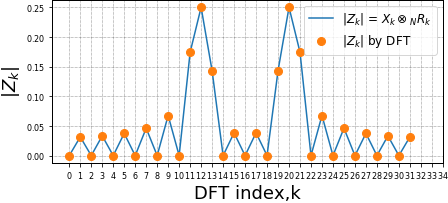

In [14]:
fig,ax=plt.subplots()
fig.set_size_inches((7,3))
ax.plot(a,abs(R[idx,0]*X)/sqrt(Nf), label=r'$|Z_k|$ = $X_k\otimes_N R_k$')
ax.plot(a, abs(Z),'o',label=r'$|Z_k|$ by DFT')
ax.set_xlabel('DFT index,k',fontsize=18)
ax.set_ylabel(r'$|Z_k|$',fontsize=18)
ax.set_xticks(arange(ax.get_xticks().max()))
ax.tick_params(labelsize=8)
ax.legend(loc=0);

# fig.savefig('figure_00@.png', bbox_inches='tight', dpi=300)

## Summary

In this section, we unpacked the issues involved in resolving two nearby frequencies using the DFT and once again confronted the uncertainty principle in action. We realized that longer DFTs cannot distinguish nearby frequencies unless the signal is sampled over a sufficient duration. Additionally, we developed the circular convolution as a tool to visualize the exactly how a longer sampling duration helps resolve frequencies.

As usual, the corresponding IPython notebook for this post  is available for download [here](https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Frequency_Resolution.ipynb). 

Comments and corrections welcome!

References
---------------

* Oppenheim, A. V., and A. S. Willsky. "Signals and Systems." Prentice-Hall, (1997).
* Proakis, John G. "Digital signal processing: principles algorithms and applications". Pearson Education India, 2001.